In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#Loading CSV files

In [13]:
joined_processed_train = pd.read_csv("Train-OOF.csv")
joined_processed_train.describe

<bound method NDFrame.describe of           id  amount_tsh      funder  ...  AvgTemp AvgPrecipitation    status_group
0      69572      6000.0       roman  ...        2                4      functional
1       8776         0.0       other  ...        9               13      functional
2      34310        25.0       other  ...        0                3      functional
3      67743         0.0      unicef  ...       18               15  non functional
4      19728         0.0       other  ...        5               19      functional
...      ...         ...         ...  ...      ...              ...             ...
59395  60739        10.0     germany  ...        6                6      functional
59396  27263      4700.0       other  ...        2                4      functional
59397  37057         0.0       other  ...        1                5      functional
59398  31282         0.0       other  ...        8                0      functional
59399  26348         0.0  world bank  ... 

In [5]:
y = joined_processed_train["status_group"]
y

0            functional
1            functional
2            functional
3        non functional
4            functional
              ...      
59395        functional
59396        functional
59397        functional
59398        functional
59399        functional
Name: status_group, Length: 59400, dtype: object

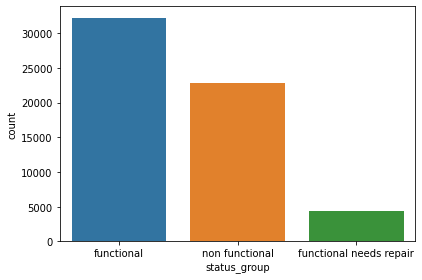

In [6]:
sns.countplot(x='status_group', data=joined_processed_train)
plt.tight_layout()

In [12]:
joined_processed_train['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [ ]:
test_df = pd.read_csv("Test-OOF.csv")
test_df.dtypes

id                         int64
amount_tsh               float64
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting              bool
scheme_name               object
permit                      bool
construction_year          int64
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
quality_group             object
quantity                  object
source                    object
source_type               object
source_class              object
waterpoint

In [ ]:
float_cols = ["amount_tsh","longitude","latitude","Population1","area_km2","Pop_Den","AvgTemp","AvgPrecipitation"]

int_cols = ["gps_height","num_private","population","year","month"]

categorical_cols = [
        'funder', 'installer','wpt_name', 'basin',
       'subvillage', 'region',  'district_code', 
       'lga', 'ward','public_meeting',  
       'scheme_name', 'permit', 
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment',  
       'quality_group', 'quantity', 'source', 
       'source_type','source_class',  
       'ward_type'
       ]

cols = categorical_cols+int_cols+float_cols+["date_recorded"]

In [ ]:
cat_cols = categorical_cols +["status_group"]

In [ ]:
joined_processed_train_cat = joined_processed_train.loc[:,cat_cols]

In [ ]:
joined_processed_train.head()

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Population1,area_km2,ward_type,Pop_Den,AvgTemp,AvgPrecipitation,status_group,year,month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
69572,0.017142,Roman,0.517483,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,7346.0,967.508323,Rural,8.0,21.479231,802.478667,functional,2011,3
8776,0.000907,Grumeti,0.520629,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,True,GeoData Consultants Ltd,Other,M,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,12849.0,701.166119,Rural,18.0,22.310769,1121.377333,functional,2013,3
34310,0.000071,Lottery Club,0.271329,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,7417.0,725.708443,Rural,10.0,21.424615,710.063333,functional,2013,2
67743,0.000907,Unicef,0.123427,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,B,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,10826.0,578.295115,Rural,19.0,25.329231,1212.437000,non functional,2013,1
19728,0.000907,Action In A,0.265139,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,V,K,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,12803.0,397.393302,Rural,32.0,21.834615,1264.312000,functional,2011,7


In [ ]:
test.head().dtypes

amount_tsh               float64
funder                    object
gps_height               float64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting              bool
recorded_by               object
scheme_management         object
scheme_name               object
permit                      bool
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_type              object
water_quality             object
quality_gr

In [ ]:
X_selected = joined_processed_train.drop(columns=["status_group"])


In [ ]:
test

,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,Population1,area_km2,ward_type,Pop_Den,AvgTemp,AvgPrecipitation,year,month,estimated_age
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
50785,0.001613,Dmdd,0.724418,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,K,True,52,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other,732.0,863.0,Rural,104.0,0.0,3.0,2013,2,1
51630,0.001613,Government Of Tanzania,0.573747,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,40,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,49.0,25.0,Rural,479.0,3.0,2.0,2013,2,13
17168,0.001613,Government Of Tanzania,0.573042,DWE,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,True,50,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other,681.0,450.0,Mixed,204.0,7.0,1.0,2013,2,3
45559,0.001613,Finn Water,0.114326,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,True,GeoData Consultants Ltd,VWC,G,True,27,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other,2.0,1845.0,Rural,0.0,17.0,20.0,2013,1,26
49871,0.002499,Bruder,0.464714,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,True,GeoData Consultants Ltd,Water Board,BRUDER,True,40,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,761.0,979.0,Rural,176.0,13.0,16.0,2013,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39307,0.001613,Danida,0.032110,Da,38.852669,-6.582841,Kwambwezi,0,Wami / Ruvu,Yombo,Pwani,6,1,Bagamoyo,Yombo,20,True,GeoData Consultants Ltd,VWC,Bagamoyo wate,True,28,mono,mono,motorpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,470.0,701.0,Rural,104.0,19.0,17.0,2011,2,23
18990,0.004999,Hiap,0.251287,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,Pangani,Mkondoa,Tanga,4,7,Kilindi,Mvungwe,2960,True,GeoData Consultants Ltd,VWC,H,False,34,nira/tanira,nira/tanira,handpump,vwc,user-group,pay annually,annually,salty,salty,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,1525.0,1460.0,Rural,78.0,15.0,9.0,2011,3,17
28749,0.001613,Government Of Tanzania,0.540932,DWE,34.739804,-4.585587,Bwawani,0,Internal,Juhudi,Singida,13,2,Singida Rural,Ughandi,200,True,GeoData Consultants Ltd,VWC,M,True,50,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,dam,dam,surface,communal standpipe,communal standpipe,1317.0,957.0,Rural,149.0,7.0,1.0,2013,3,3


In [ ]:
num_cols = int_cols+float_cols
cat_cols_selected = list(set(joined_processed_train.columns)-set(num_cols)-set(['status_group']))

In [ ]:
X_selected[cat_cols_selected] = X_selected[cat_cols_selected].astype('category')
test_df[cat_cols_selected] = test_df[cat_cols_selected].astype('category')

In [ ]:
X_selected[cat_cols_selected].dtypes

scheme_management        category
public_meeting           category
lga                      category
management_group         category
quantity                 category
source                   category
extraction_type_group    category
payment_type             category
region_code              category
quality_group            category
payment                  category
district_code            category
waterpoint_type_group    category
recorded_by              category
installer                category
ward_type                category
waterpoint_type          category
permit                   category
water_quality            category
source_type              category
quantity_group           category
ward                     category
wpt_name                 category
construction_year        category
source_class             category
region                   category
basin                    category
funder                   category
management               category
extraction_typ

In [ ]:
test[cat_cols_selected].dtypes

scheme_management        category
public_meeting           category
lga                      category
management_group         category
quantity                 category
source                   category
extraction_type_group    category
payment_type             category
region_code              category
quality_group            category
payment                  category
district_code            category
waterpoint_type_group    category
recorded_by              category
installer                category
ward_type                category
waterpoint_type          category
permit                   category
water_quality            category
source_type              category
quantity_group           category
ward                     category
wpt_name                 category
construction_year        category
source_class             category
region                   category
basin                    category
funder                   category
management               category
extraction_typ

In [ ]:
!pip install catboost

     |████████████████████████████████| 76.3 MB 1.3 MB/s 


In [ ]:
 from catboost import CatBoostClassifier

 model = CatBoostClassifier(
        max_ctr_complexity=5,
        task_type='CPU',
        iterations=1000,
        eval_metric='AUC',
        od_type='Iter',
        od_wait=500,
        class_weights = [.21,.82,.97],
        cat_features = cat_cols_selected,
        verbose=False
    )

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, random_state = 42, test_size=0.2,  stratify=y)

In [ ]:
model.fit(X_train,y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
pred1 = model.predict(X_train)

Train set Accuracy Score:  0.8841750841750842
Test set Accuracy Score:  0.811952861952862


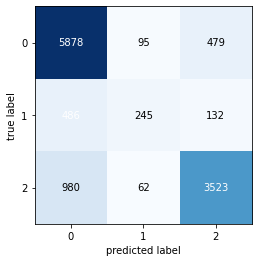

In [ ]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import accuracy_score
print("Train set Accuracy Score: ", accuracy_score(y_train, pred1))
print("Test set Accuracy Score: ", accuracy_score(y_test, pred))
cm = confusion_matrix(y_test, pred.flatten())
plot_confusion_matrix(cm)
plt.show()


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

print("   Accuracy: {}".format(metrics.accuracy_score(y_test, pred)))

print('Train set classification report: ')
print(classification_report(y_train, pred1))
print('Validation test set classification report: ')
print(classification_report(y_test, pred))

   Accuracy: 0.811952861952862
Train set classification report: 
                         precision    recall  f1-score   support

             functional       0.86      0.96      0.91     25807
functional needs repair       0.80      0.46      0.59      3454
         non functional       0.93      0.86      0.89     18259

               accuracy                           0.88     47520
              macro avg       0.86      0.76      0.80     47520
           weighted avg       0.88      0.88      0.88     47520

Validation test set classification report: 
                         precision    recall  f1-score   support

             functional       0.80      0.91      0.85      6452
functional needs repair       0.61      0.28      0.39       863
         non functional       0.85      0.77      0.81      4565

               accuracy                           0.81     11880
              macro avg       0.75      0.66      0.68     11880
           weighted avg       0.81      0

#For the test dataset

In [ ]:
X_selected.shape, test.shape

((59400, 46), (14850, 47))

In [ ]:
model.fit(X_selected,y)

In [ ]:
test = pd.read_csv("Test-OOF.csv")

In [ ]:
pred = model.predict(test)

In [ ]:
pred

array([['functional'],
       ['functional'],
       ['functional'],
       ...,
       ['functional'],
       ['functional'],
       ['non functional']], dtype=object)

Submission

In [ ]:
test.index

Int64Index([50785, 51630, 17168, 45559, 49871, 52449, 24806, 28965, 36301,
            54122,
            ...
            59757, 64579, 57731, 65541, 68174, 39307, 18990, 28749, 33492,
            68707],
           dtype='int64', name='id', length=14850)

In [ ]:
y_pred_df = pd.DataFrame(
    {
        "status_group": pred.flat
    },
    index = test.index
)

In [ ]:
y_pred_df.head()

,status_group
id,
50785,functional
51630,functional
17168,functional
45559,non functional
49871,functional


In [ ]:
y_pred_df.shape

(14850, 1)

In [ ]:
 y_pred_df.to_csv("submission_Catboost10_normalize5.csv", index=True)

In [ ]:
from google.colab import files
files.download("submission_Catboost10_normalize5.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>